In [1]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode

C:\Users\alext\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\alext\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\alext\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import skimage.io as io
from pylab import *
import skimage
from skimage.restoration import denoise_bilateral
from skimage import data, filters, exposure, feature, measure
from skimage import img_as_float
from skimage.morphology import disk, reconstruction
import scipy
from matplotlib import pylab as plt  
import numpy as np

import warnings
warnings.simplefilter("ignore")
plt.rcParams["figure.figsize"] = (30,20)

In [3]:
img_names = ["05102009104.jpg", "05102009155.jpg", \
             "05102009202.jpg", "PfggfhgICT0034.jpg", \
             "PICT00hfghg10.jpg",  "PIghCT0005.jpg", \
             "PICT00ghhgh26.jpg", "sample1.jpg"]

img_dirs = []
for name in img_names:
    img_dirs.append("img/barcodes/" + name)

print(img_dirs)

['img/barcodes/05102009104.jpg', 'img/barcodes/05102009155.jpg', 'img/barcodes/05102009202.jpg', 'img/barcodes/PfggfhgICT0034.jpg', 'img/barcodes/PICT00hfghg10.jpg', 'img/barcodes/PIghCT0005.jpg', 'img/barcodes/PICT00ghhgh26.jpg', 'img/barcodes/sample1.jpg']


Barcode detection using zbar

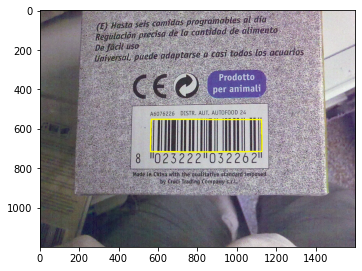

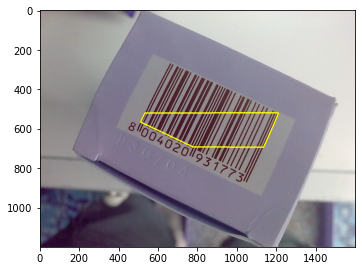

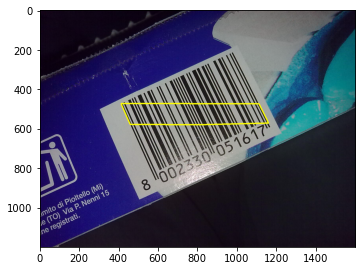

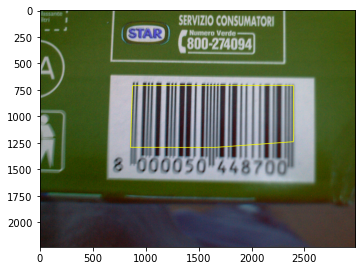

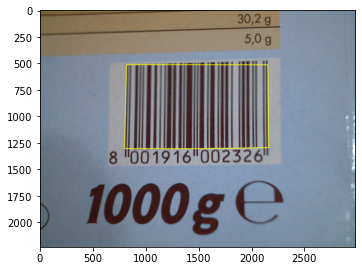

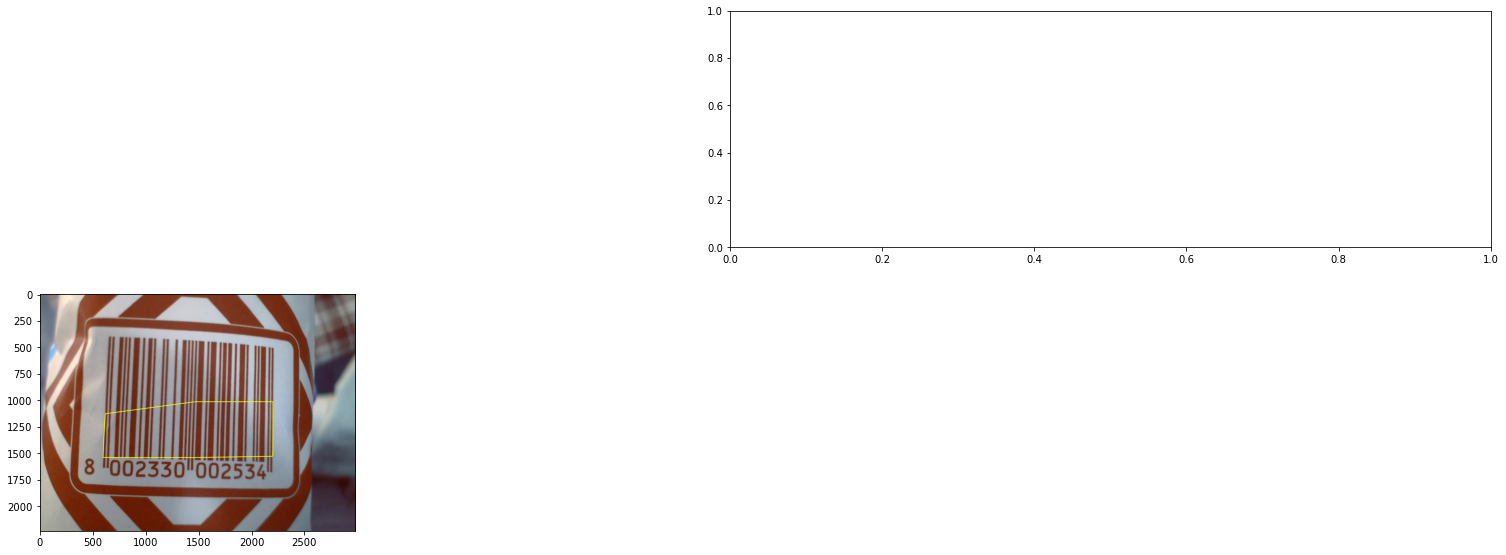

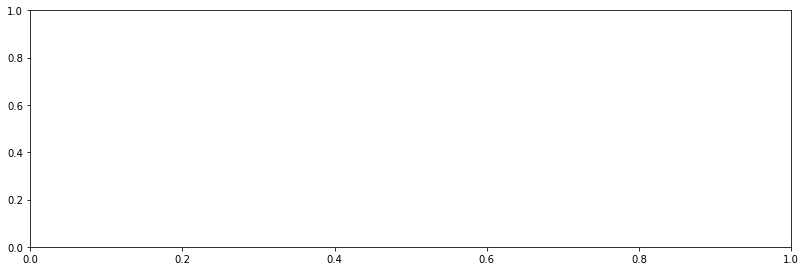

In [5]:
for i, img_dir in enumerate(img_dirs):
    
    img = cv2.imread(img_dir)
    ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    subplot(4,2,i+1)
    for barcode in decode(bw_img):
        #print(barcode.data)
        mydata = barcode.data.decode('utf-8')
        #print(mydata)
        pts = np.array([barcode.polygon], np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img, [pts], True, (255,255,0), 5)
        
        plt.imshow(img)
        plt.show()

Our implementation - morphological transformations

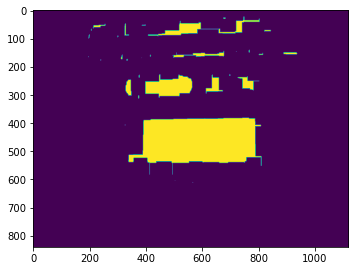

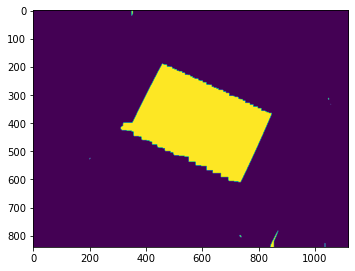

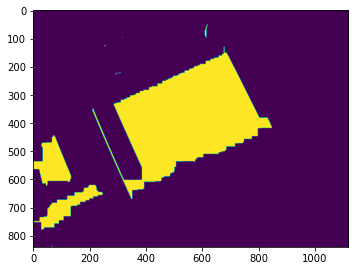

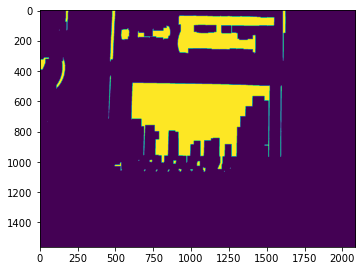

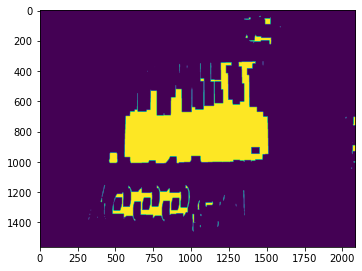

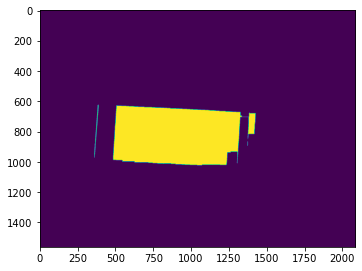

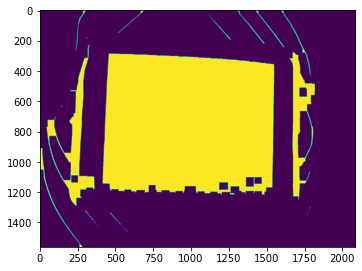

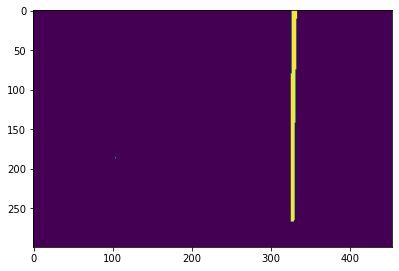

In [11]:
img_pairs = []
for i, img_dir in enumerate(img_dirs):
    
    img = cv2.imread(img_dir)
    img = cv2.resize(img, None, fx=0.7, fy=0.7, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     bw_img = cv2.GaussianBlur(gray, (7, 7), 0)
#     ret, bw_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)  
    bw_img = gray
    
    
    # edge detection kernel
    gX = cv2.Sobel(bw_img, cv2.CV_64F, 1, 0, ksize=27)
    gY = cv2.Sobel(bw_img, cv2.CV_64F, 0, 1, ksize=11)
    bw_img = np.sqrt((gX ** 2) + (gY ** 2))
#     bw_img = cv2.Canny(image=bw_img, threshold1=100, threshold2=200)
        
    # dilation and erosion
    bw_img = cv2.dilate(bw_img, None, iterations = 21)
    bw_img = cv2.erode(bw_img, None, iterations = 21)
    
    bw_img = cv2.normalize(bw_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1 )
    ret, bw_img = cv2.threshold(bw_img, 0.5, 1, cv2.THRESH_BINARY)
    
    img_pairs.append((img, bw_img))
    
    subplot(4,2,i+1)
    plt.imshow(bw_img)
    plt.show()

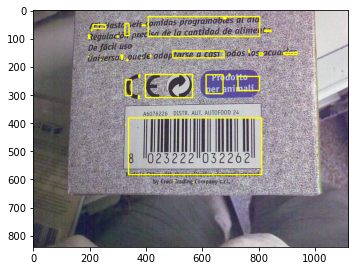

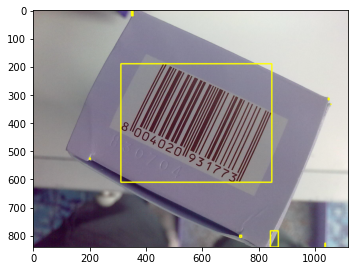

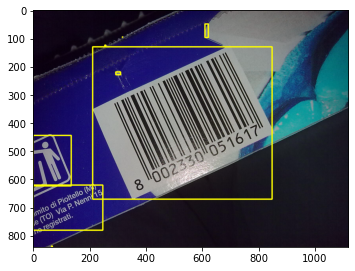

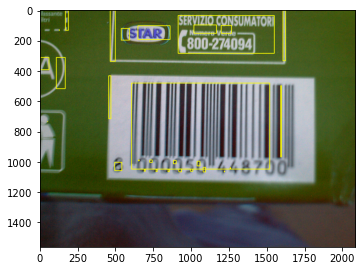

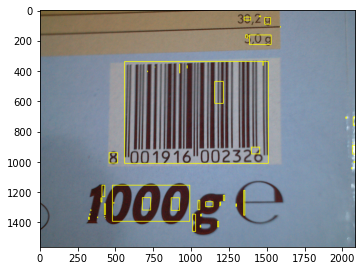

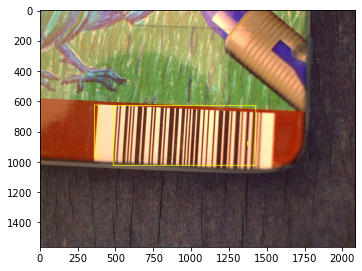

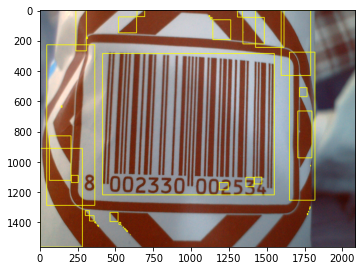

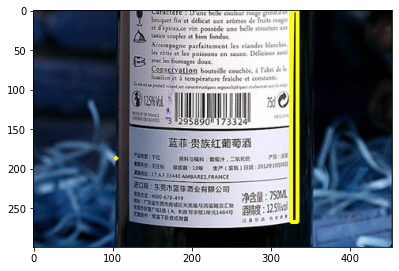

In [9]:
for i, img_pair in enumerate(img_pairs):
    img, bw_img = img_pair
    _, contours, _ = cv2.findContours(bw_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for j, c in enumerate(contours):

        contours_poly[j] = cv2.approxPolyDP(c, 3, True)
        boundRect[j] = cv2.boundingRect(contours_poly[j])
        centers[j], radius[j] = cv2.minEnclosingCircle(contours_poly[j])

        color = (255, 255, 0)
        cv2.rectangle(img, (int(boundRect[j][0]), int(boundRect[j][1])), \
              (int(boundRect[j][0]+boundRect[j][2]), int(boundRect[j][1]+boundRect[j][3])), color, 4)


    #find contours themselves
    #     contours = cv2.findContours(bw_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #     cv2.drawContours(img, contours[1], -1, (0,255,0), 3)


    subplot(4,2,i+1)
    plt.imshow(img)
    plt.show()